In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Dataset : Restaurant_Reviews.tsv Link : https://www.kaggle.com/akram24/restaurant-reviews

df = pd.read_csv("Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.shape

(1000, 2)

In [5]:
len(df)

1000

In [6]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [7]:
df.dtypes

Review    object
Liked      int64
dtype: object

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


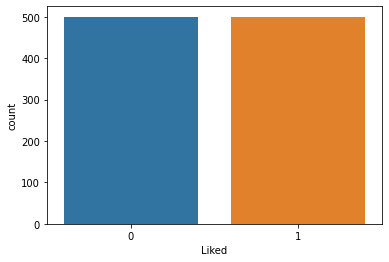

In [8]:
import seaborn as sns
sns.countplot(df['Liked'])

In [9]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [10]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [11]:
# Clearning the text

In [12]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
corpus = []
for i in range(0,1000):
  review = re.sub('[^a-zA-Z]'," ", df['Review'][i])
  review = review.lower()
  review = review.split()
  pe = PorterStemmer()
  all_stopword = stopwords.words("english")
  type(all_stopword)
  all_stopword.remove("not")
  review = [pe.stem(word) for word in review if not word in set(all_stopword)]
  review = " ".join(review)
  corpus.append(review)

In [15]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [16]:
# Creating a bag of words model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = df['Liked']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
classifier = GaussianNB().fit(x_train,y_train)
cls = MultinomialNB().fit(x_train,y_train)

In [22]:
cls.score(x_test,y_test)

0.775

In [23]:
classifier.score(x_test,y_test)

0.73

In [24]:
y_pred = cls.predict(x_test)

In [25]:
type(y_test)

pandas.core.series.Series

In [26]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

[[74 23]
 [22 81]] 77.5


In [28]:
type(y_test)

pandas.core.series.Series

In [29]:
import pickle

In [31]:
pickle.dump(cls,open("review.pkl","wb"))

In [33]:
loaded_model = pickle.load(open("review.pkl","rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)

0.775

In [34]:
#Prediction result for New Reviews

In [35]:
def new_review(new_review):
  new_review = new_review
  new_review = re.sub('[^a-zA-Z]',' ',new_review)
  new_review = new_review.lower()
  new_review = new_review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
  new_review =" ".join(new_review)
  new_corpus = [new_review]
  new_x_test = cv.transform(new_corpus).toarray()
  print(new_x_test.shape)
  new_y_pred = loaded_model.predict(new_x_test)
  return new_y_pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0] == 1:
  print("positive")
else:
  print("Negative")

Enter new review...bad bad bad i hate it
(1, 1500)
Negative
